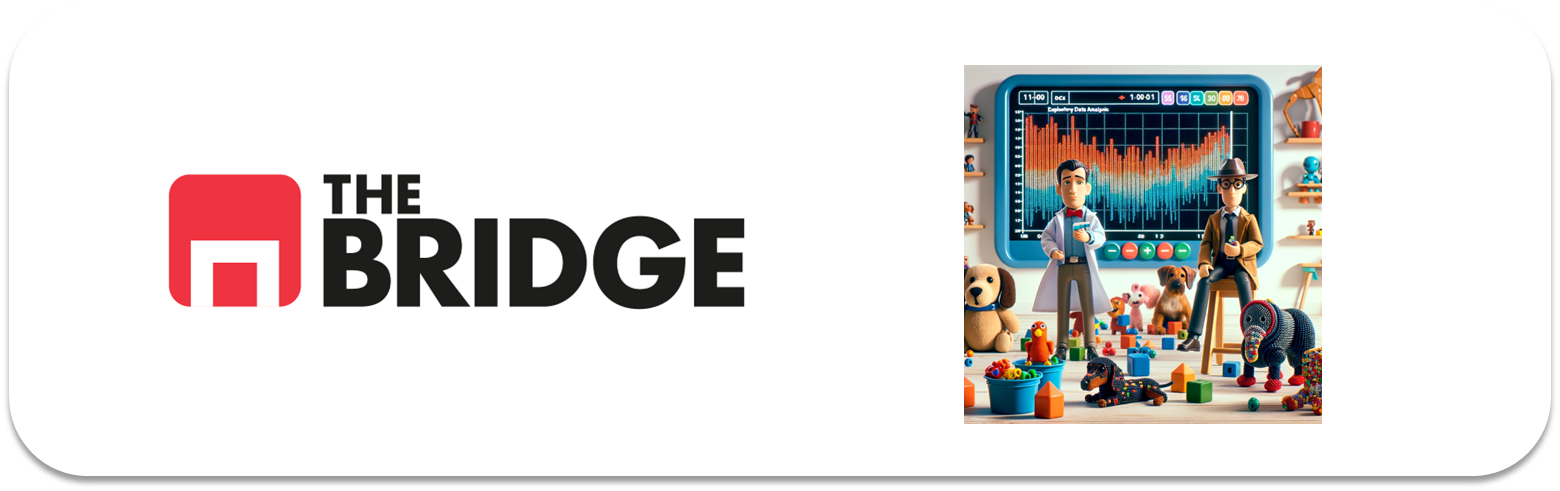

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import *


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df_titanic.drop(columns=["deck", "survived", "pclass", "embarked"], inplace=True)

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
df_titanic ["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic.drop(columns=["parch", "sibsp"], inplace=True)

In [5]:
df_titanic["family_members"].describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: family_members, dtype: float64

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [6]:
df_titanic.loc[df_titanic["embark_town"].isna(), "embark_town"] = df_titanic["embark_town"].mode()[0]

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [7]:
mujer = df_titanic["who"] == "woman"
nino = df_titanic["who"] == "child"
hombre = df_titanic["who"] == "man"

media_age_mujer = df_titanic.loc[mujer,"age"].mean()
media_age_nino = df_titanic.loc[nino,"age"].mean()
media_age_hombre = df_titanic.loc[hombre,"age"].mean()

age_nulo = df_titanic["age"].isna()

df_titanic.loc[mujer & age_nulo, "age"] = media_age_mujer
df_titanic.loc[nino & age_nulo, "age"] = media_age_nino
df_titanic.loc[hombre & age_nulo, "age"] = media_age_hombre

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


In [ ]:
df_titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

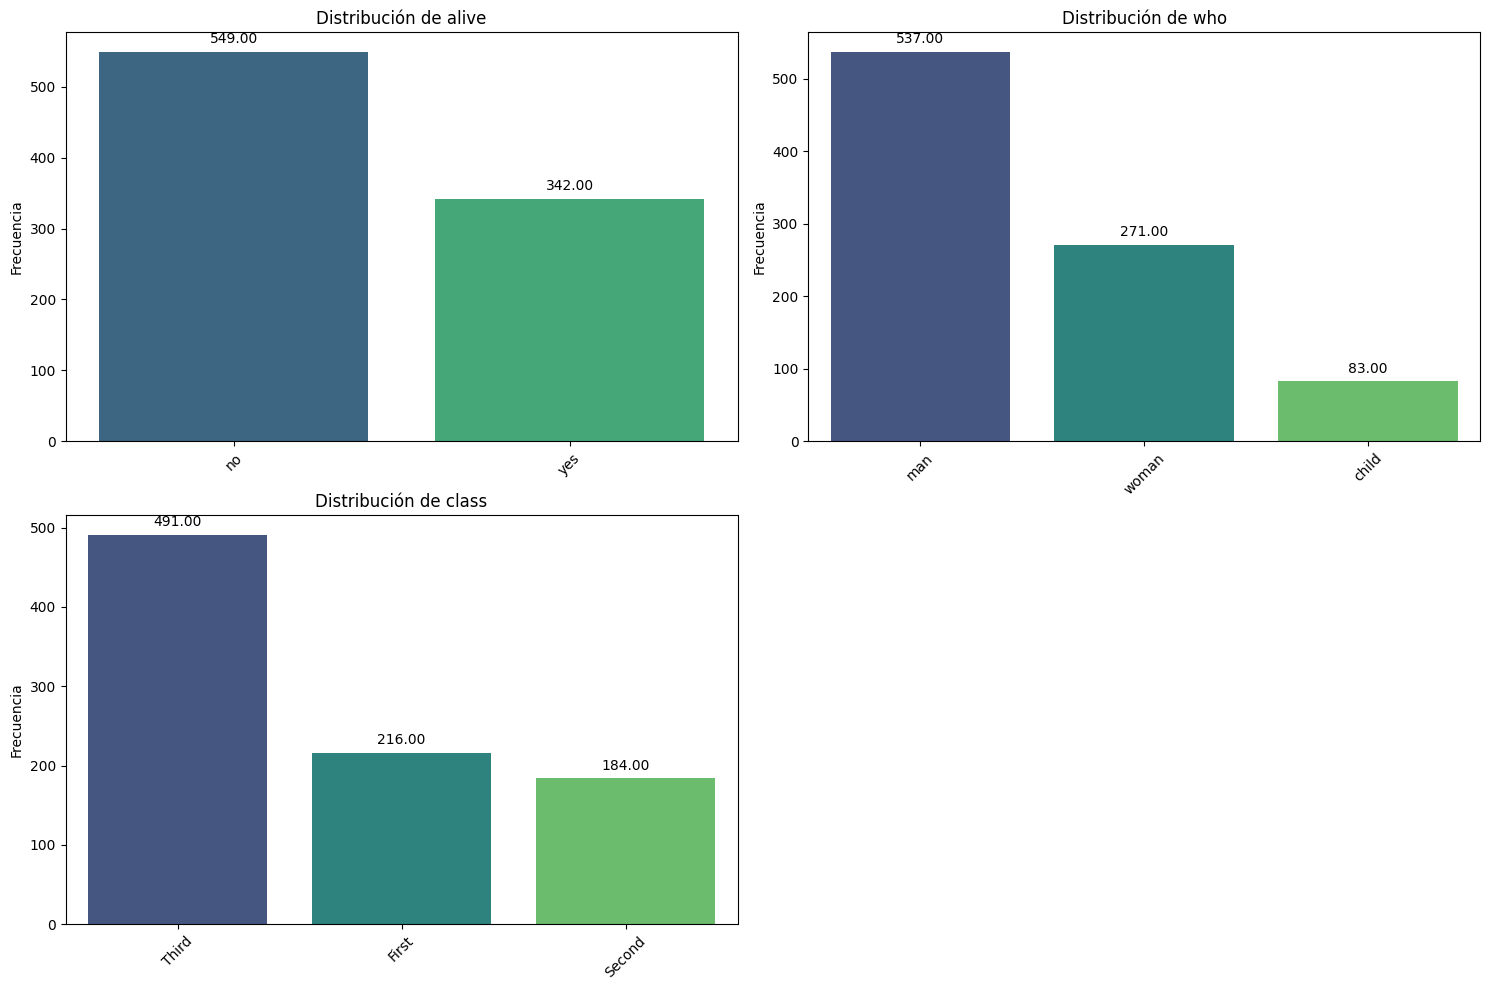

In [10]:
#Terminos absolutos
pinta_distribucion_categoricas (df_titanic, ["alive", "who", "class"], relativa = False, mostrar_valores=True)

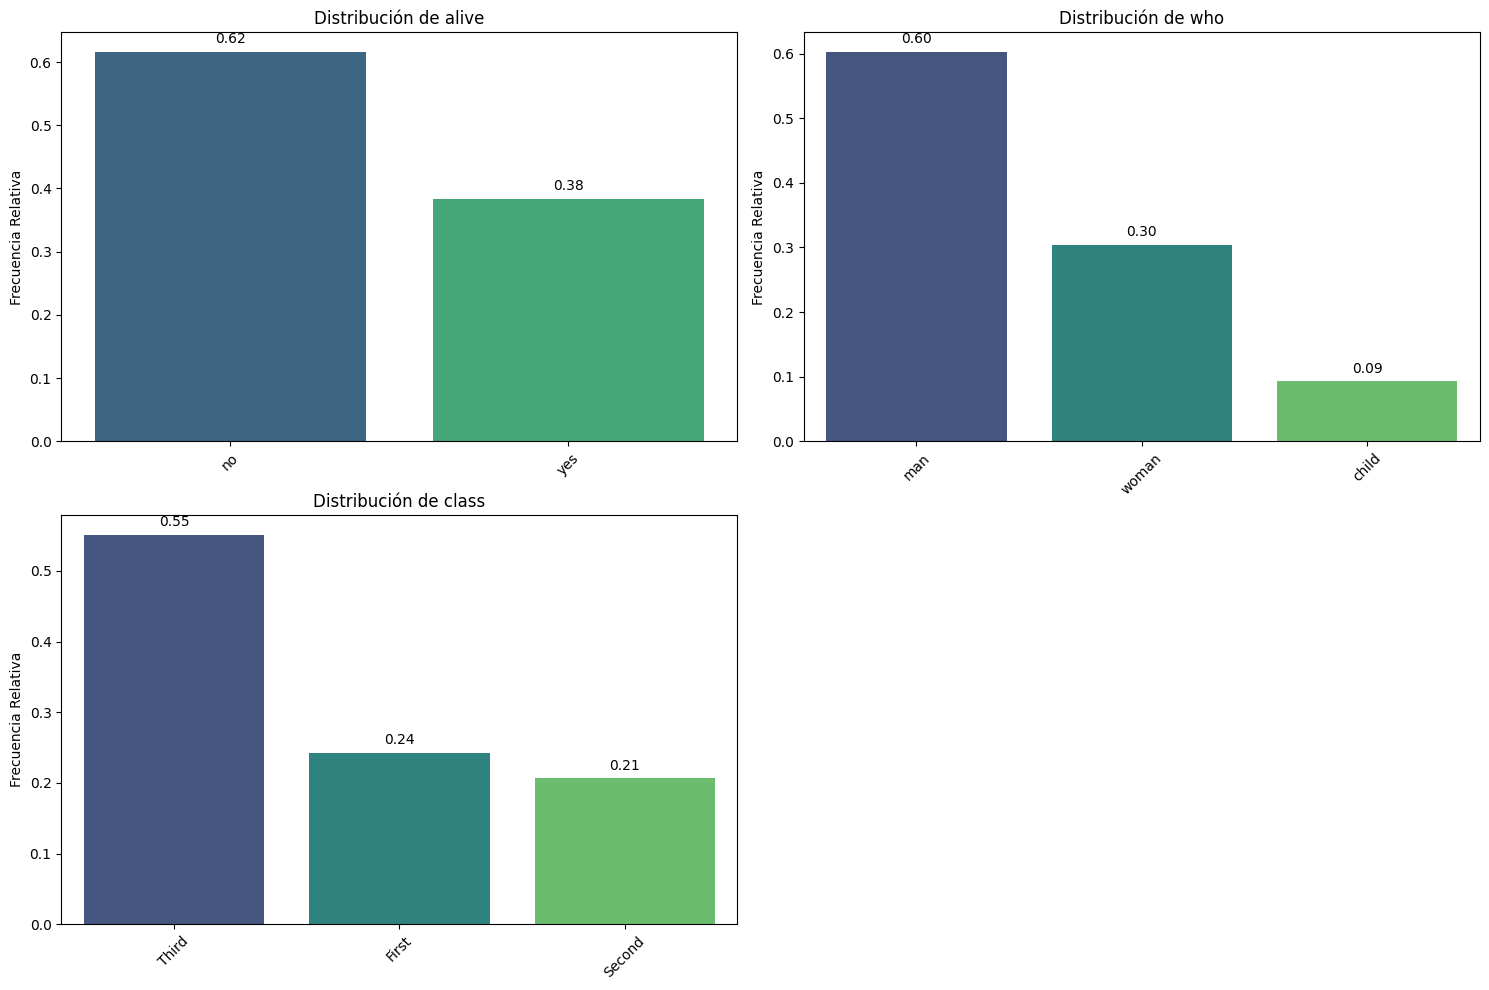

In [11]:
# Términos relativos
pinta_distribucion_categoricas (df_titanic, ["alive", "who", "class"], relativa = True, mostrar_valores=True)

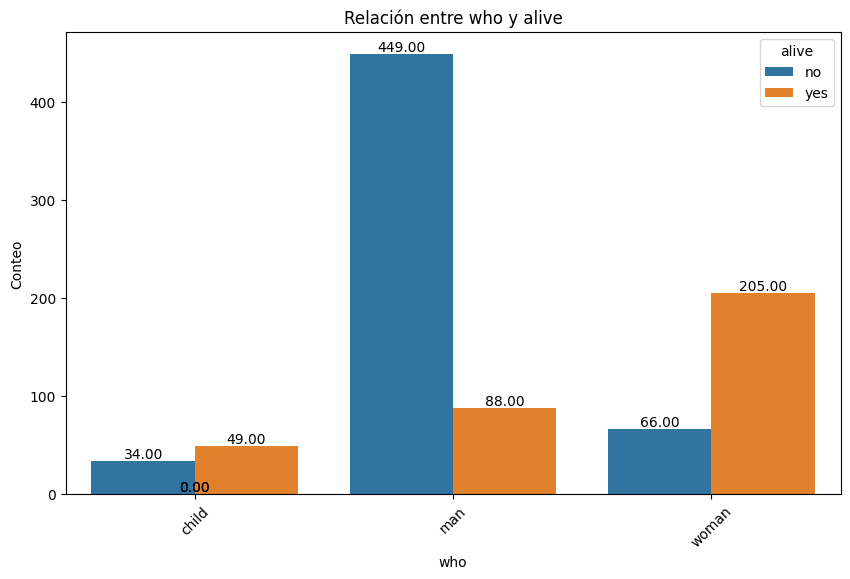

In [12]:
# Relacion entre who y alive: absoluta
plot_categorical_relationship_fin(df_titanic, "who", "alive", show_values=True)

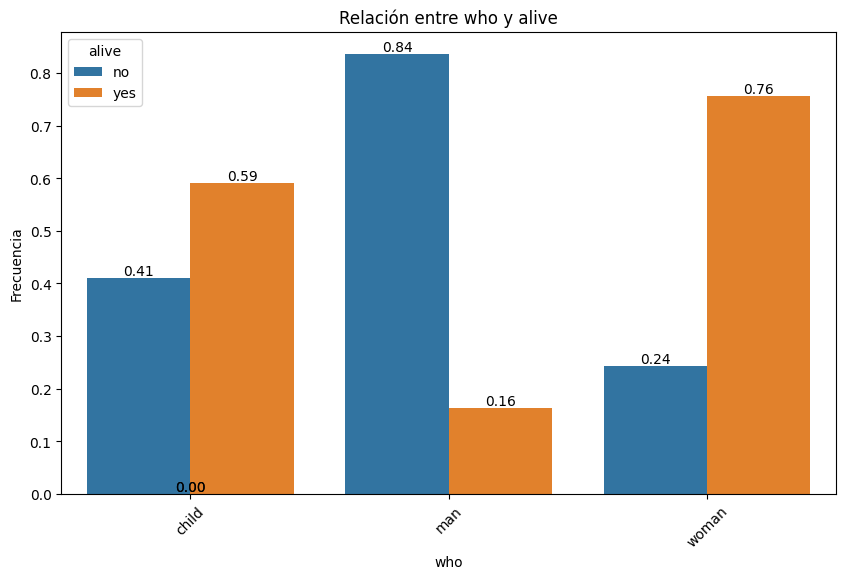

In [13]:
# Relacion entre who y alive: relativa
plot_categorical_relationship_fin(df_titanic, "who", "alive", show_values=True, relative_freq=True)

In [14]:
#comprobar la relacion entre who y alive
#primero obtenemos la tabla de contingencia
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['who'])
print (tabla_contingencia)
print()
# aplicamos la prueba chi2
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

who    child  man  woman
alive                   
no        34  449     66
yes       49   88    205

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


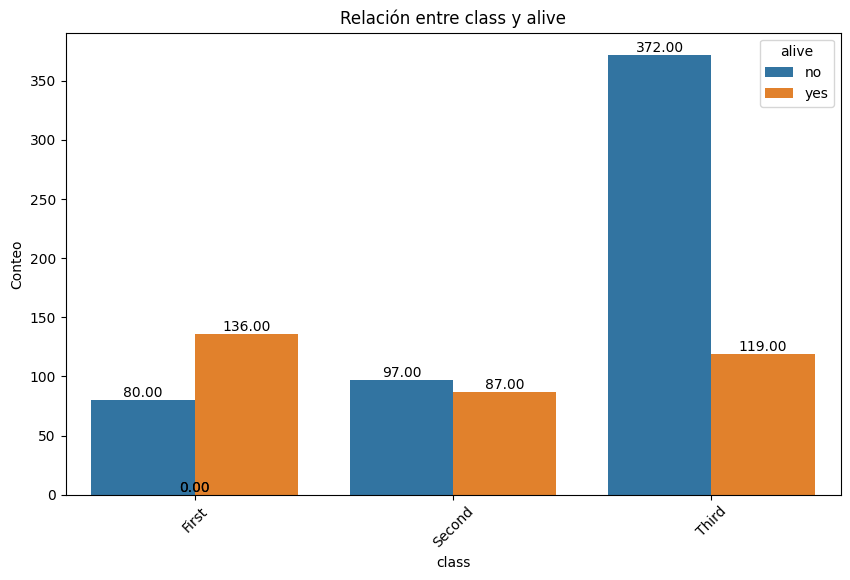

In [15]:
# Relacion entre class y alive: absoluta
plot_categorical_relationship_fin(df_titanic, "class", "alive", show_values=True)

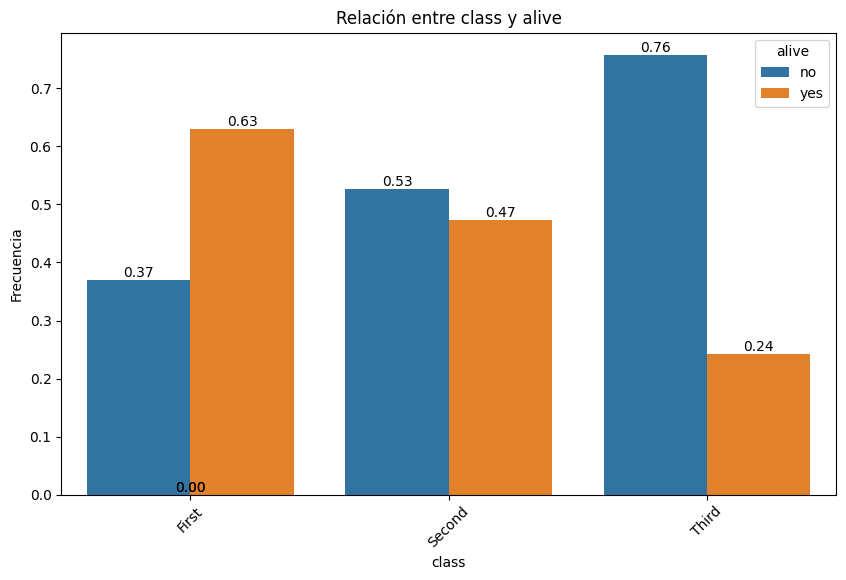

In [16]:
# Relacion entre class y alive: relativa
plot_categorical_relationship_fin(df_titanic, "class", "alive", show_values=True, relative_freq=True)

In [17]:
#comprobar la relacion entre class y alive
#primero obtenemos la tabla de contingencia
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['class'])
print (tabla_contingencia)
print()
# aplicamos la prueba chi2
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

class  First  Second  Third
alive                      
no        80      97    372
yes      136      87    119

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


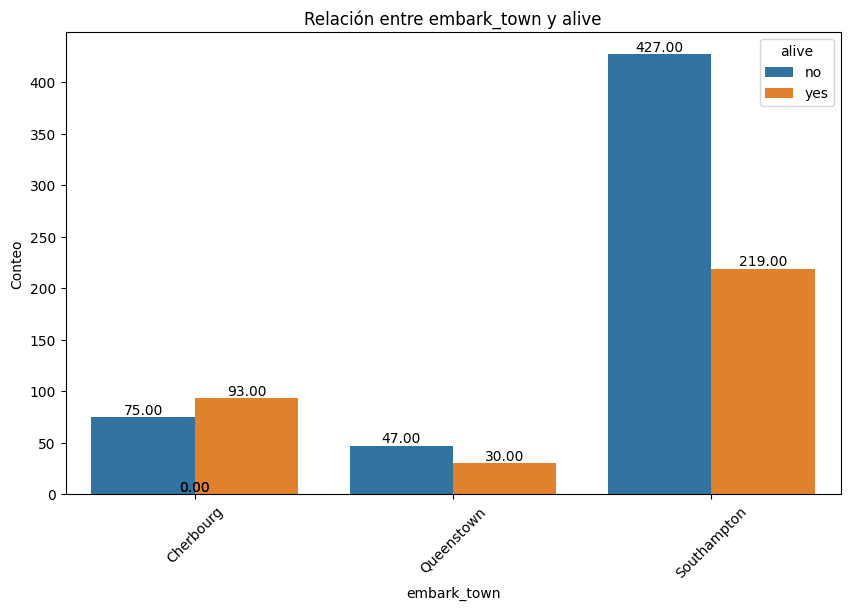

In [ ]:
# Relacion entre embark_town y alive: absoluta
plot_categorical_relationship_fin(df_titanic, "embark_town", "alive", show_values=True)

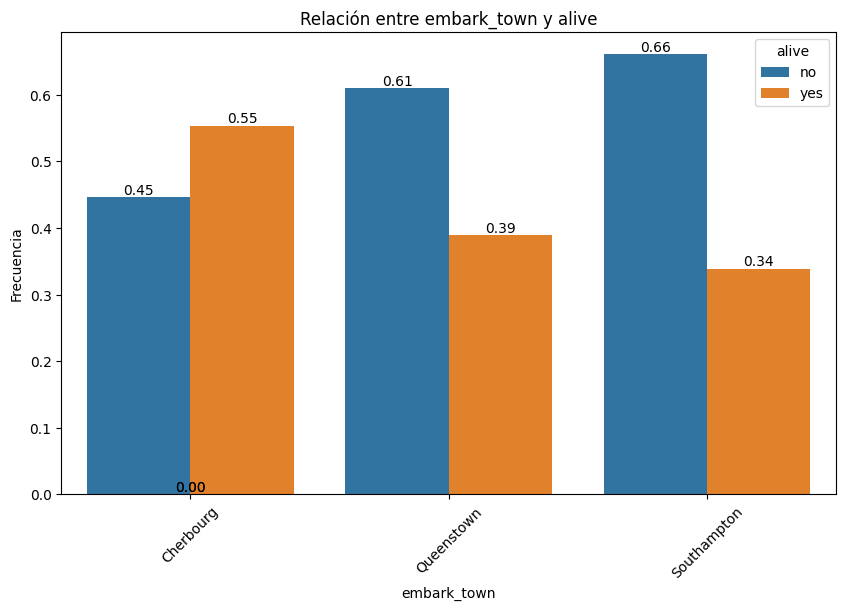

In [19]:
# Relacion entre embark_town y alive: relativa
plot_categorical_relationship_fin(df_titanic, "embark_town", "alive", show_values=True, relative_freq=True)

In [ ]:
#comprobar la relacion entre embark_town y alive
#primero obtenemos la tabla de contingencia
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['embark_town'])
print (tabla_contingencia)
print()
# aplicamos la prueba chi2
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

embark_town  Cherbourg  Queenstown  Southampton
alive                                          
no                  75          47          427
yes                 93          30          219

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


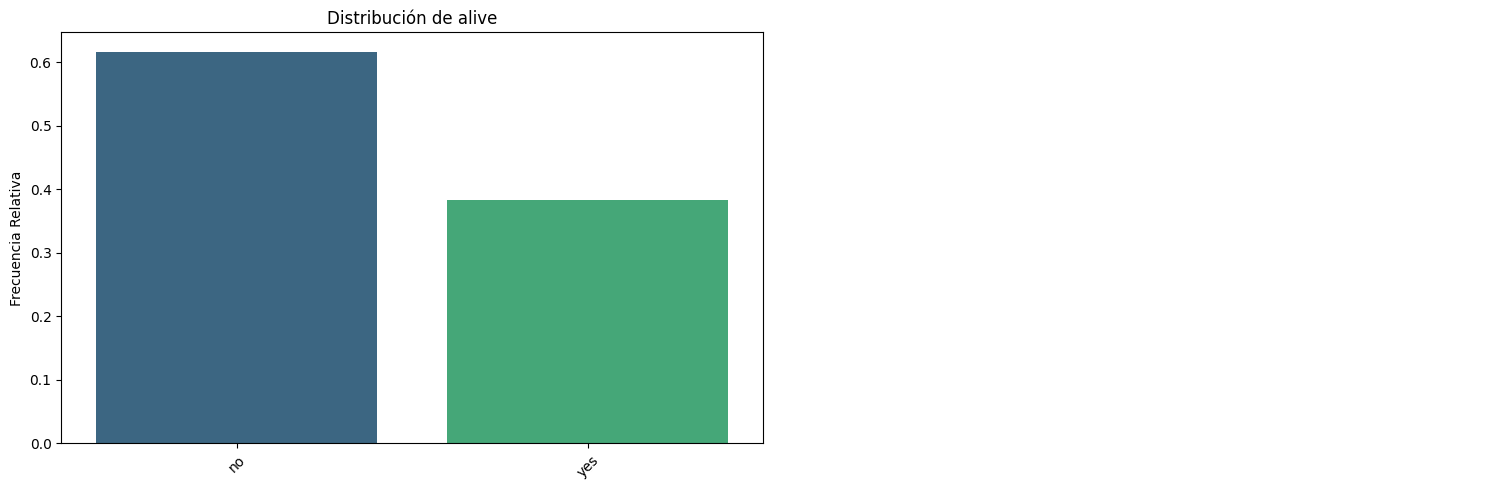

In [21]:
pinta_distribucion_categoricas(df_titanic,["alive"], relativa= True)

(2,)


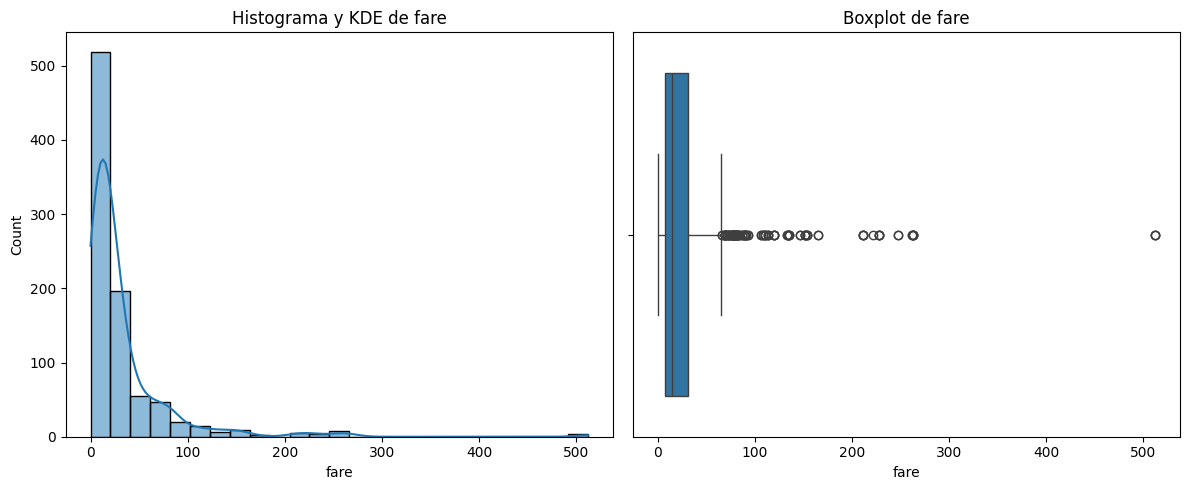

In [22]:
plot_combined_graphs(df_titanic,["fare"], bins=25)

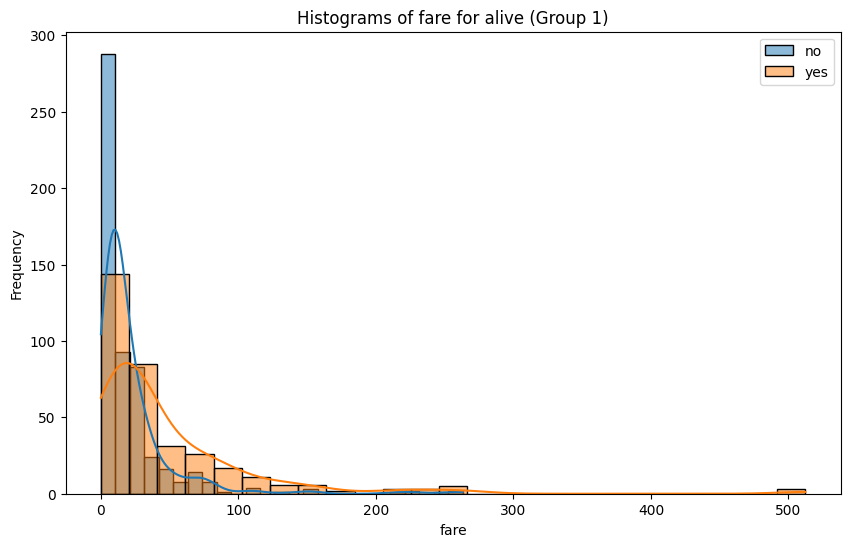

In [23]:
plot_grouped_histograms(df_titanic, cat_col="alive",num_col="fare", group_size= 2, bins=25)

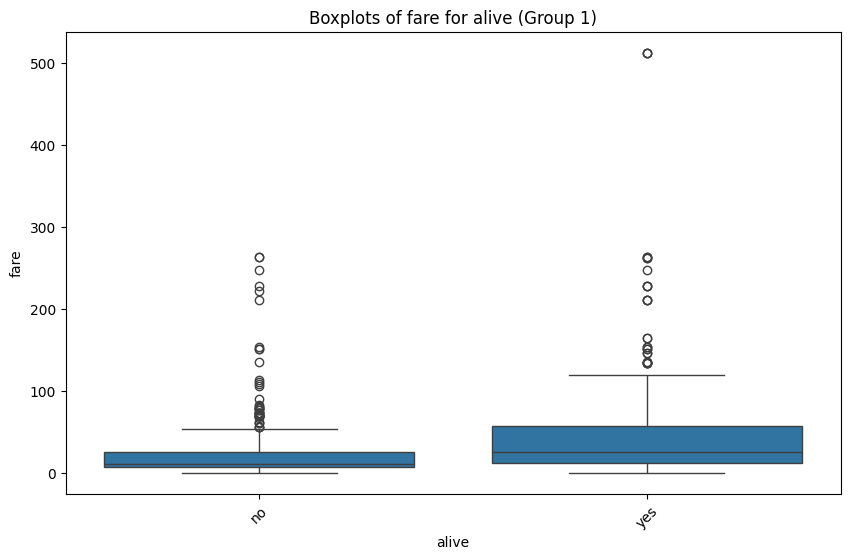

In [ ]:
plot_grouped_boxplots(df_titanic,"alive","fare")

In [25]:
# Prueba U de Mann-Whitney
#importar prueba
from scipy.stats import mannwhitneyu

# separar los datos en dos grupos segun la variable categorica: alive
grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]

# aplicar la prueba y mostrar resultados
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)
print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


In [26]:
# ver quienes pagaron 0
df_titanic.loc[df_titanic["fare"] == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0


In [27]:
# ver quien pagó lo maximo
df_titanic.loc[df_titanic["fare"] == df_titanic["fare"].max()]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


Respuesta Southampton:


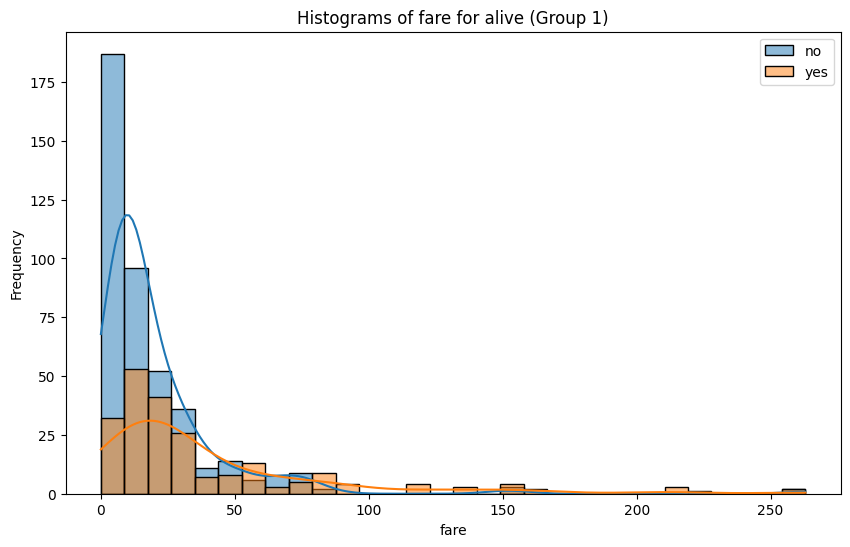

Respuesta Cherbourg:


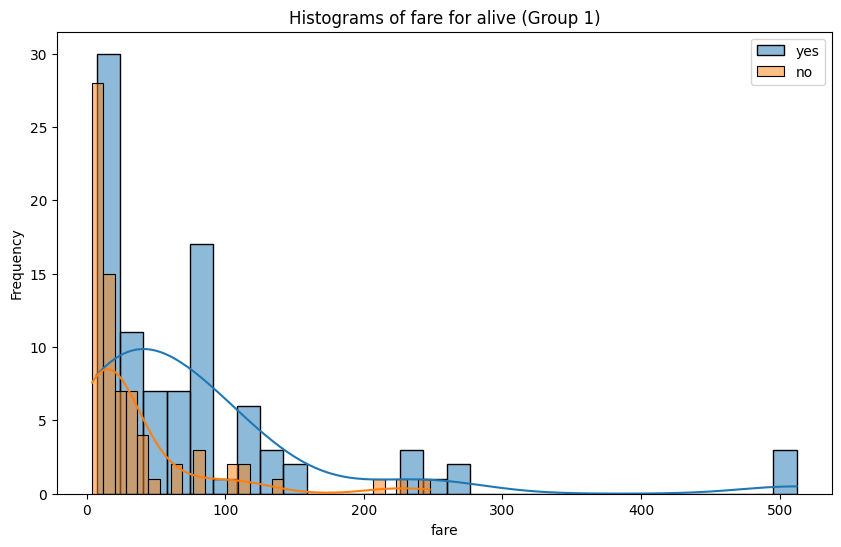

Respuesta Queenstown:


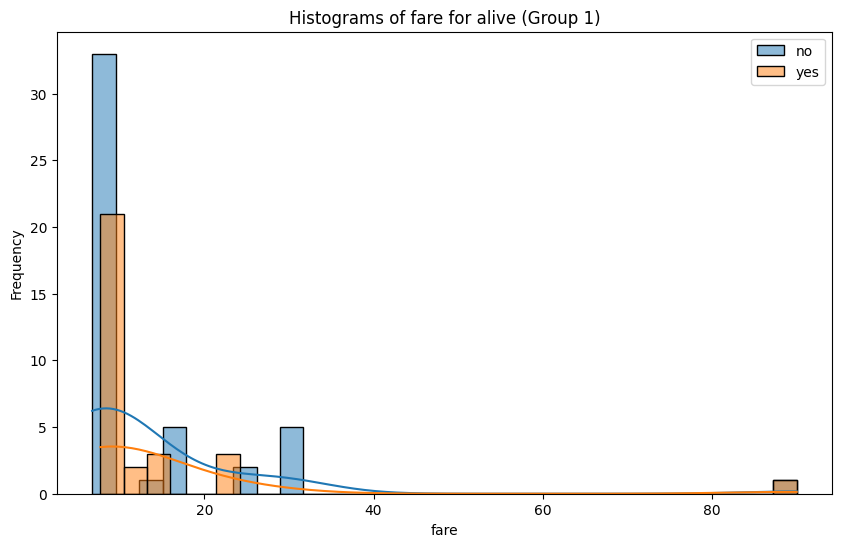

In [28]:
columnas = ["embark_town","alive","fare"] 
col_directora = "embark_town"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] 

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_grouped_histograms(df_datos,col_1,col_2,group_size=3, bins = 30 )

(2,)


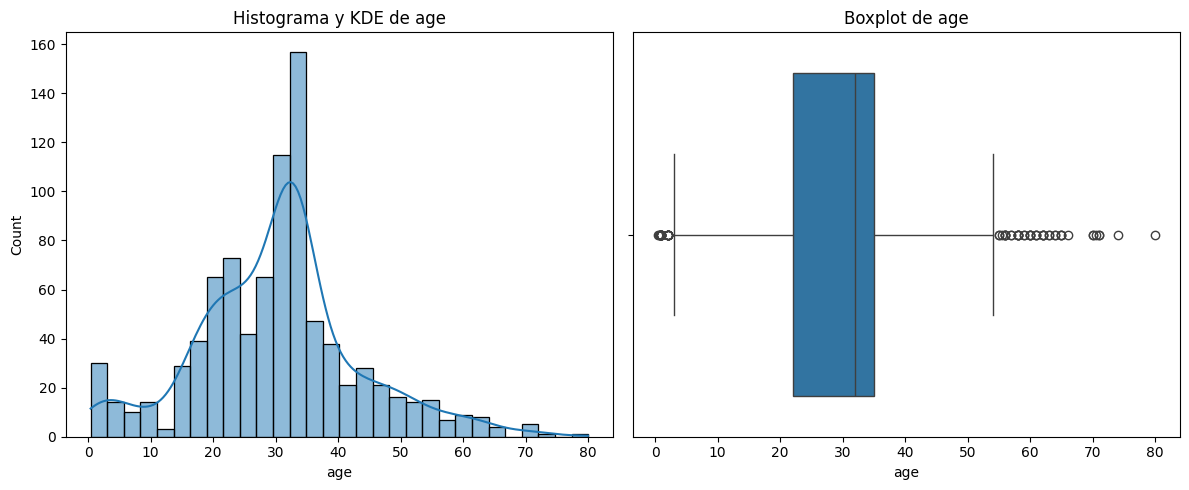

In [29]:
plot_combined_graphs(df_titanic,["age"])

Respuesta Third:


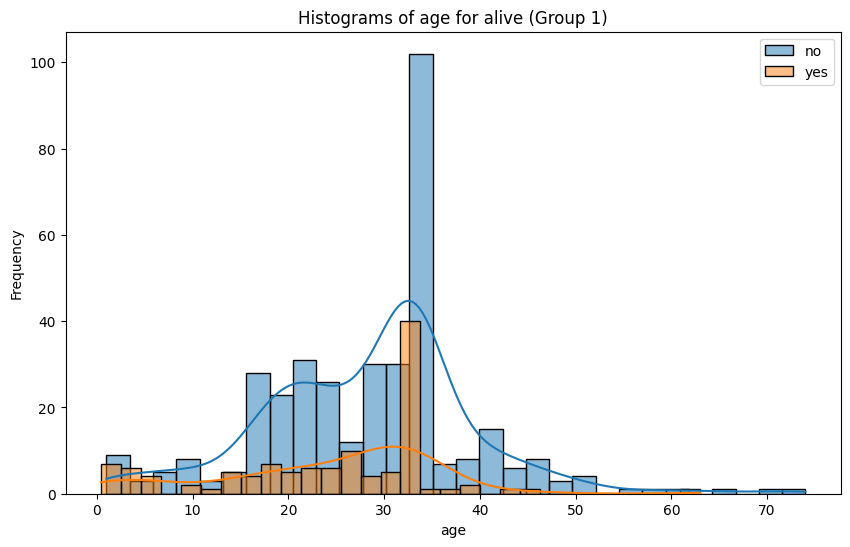

Respuesta First:


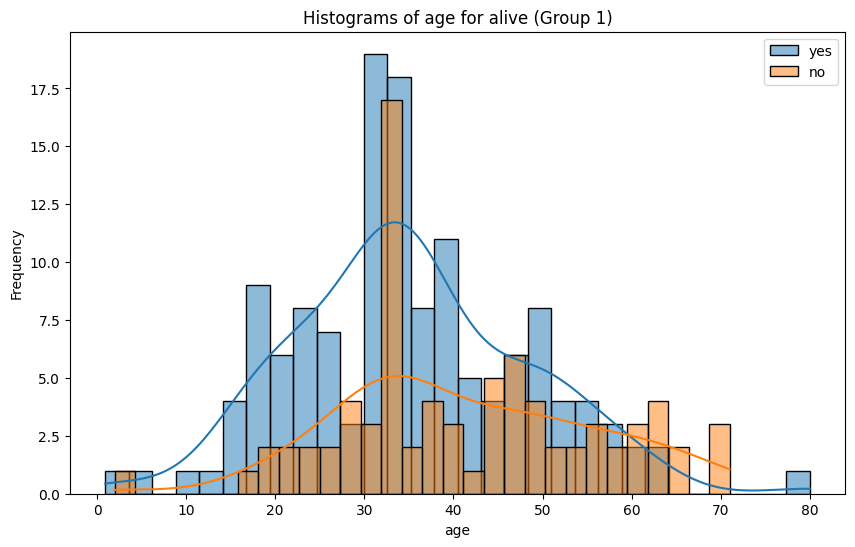

Respuesta Second:


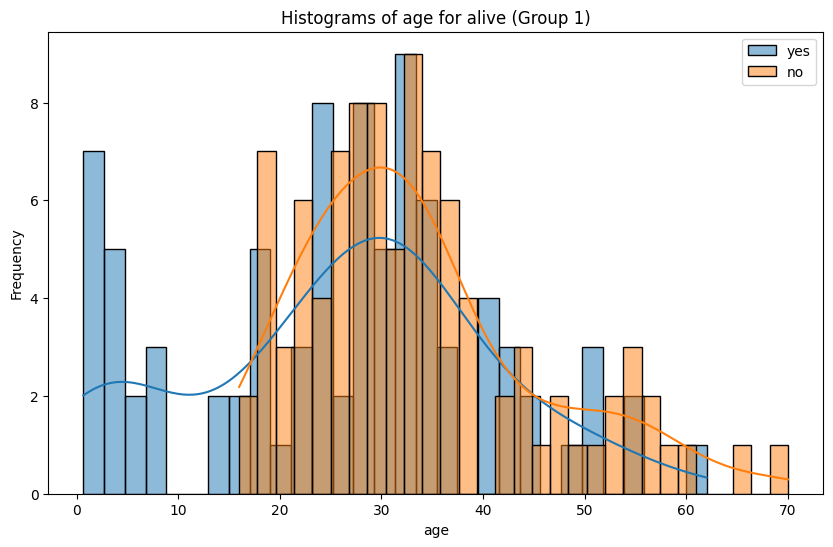

In [30]:
columnas = ["class","alive","age"] 
col_directora = "class"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] 

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_grouped_histograms(df_datos,col_1,col_2,group_size=3, bins = 30 )

Respuesta no:


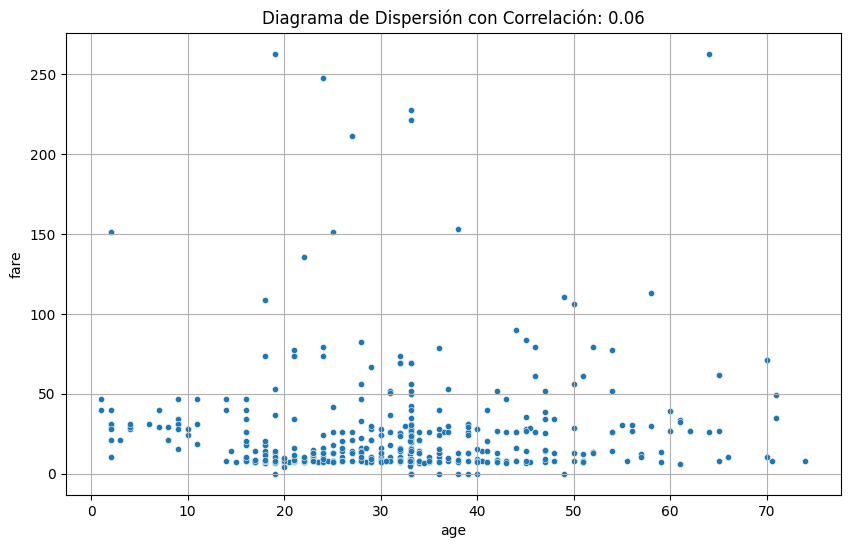

Respuesta yes:


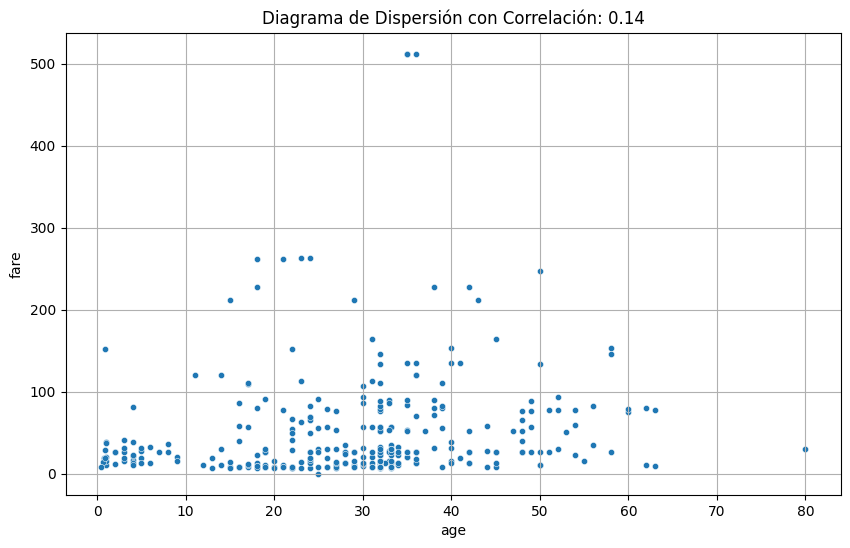

In [31]:
columnas = ["fare","alive","age"] 
col_directora = "alive"
col_1 = "fare"
col_2 = "age"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] 

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [32]:
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")

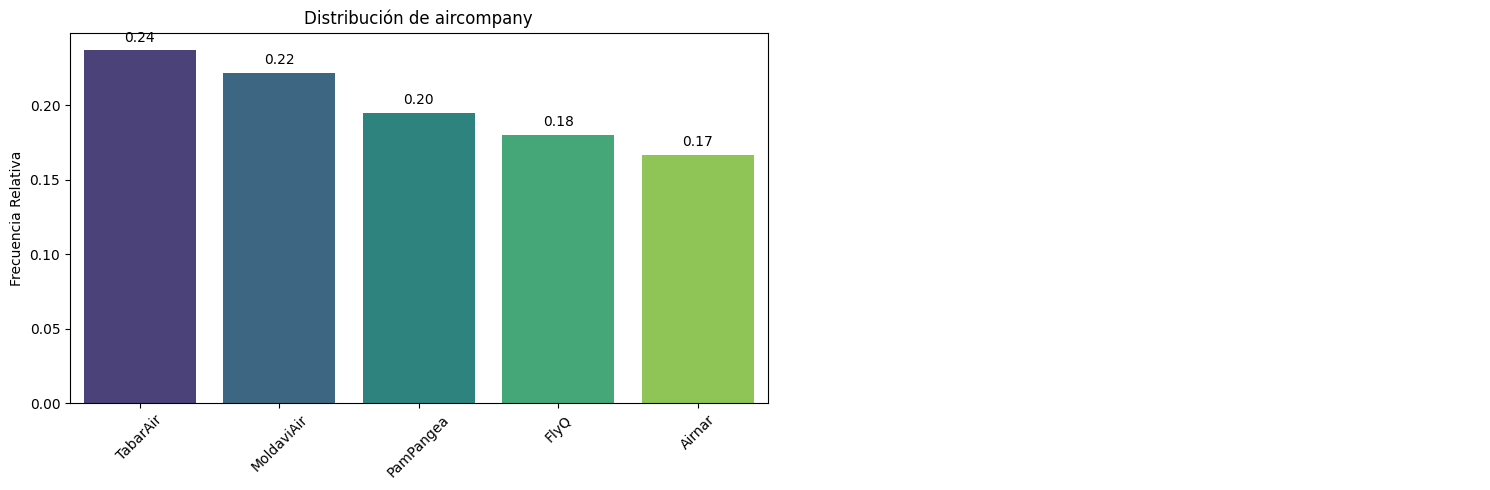

In [33]:
pinta_distribucion_categoricas(df_viajes,["aircompany"], relativa= True, mostrar_valores= True)

(2,)


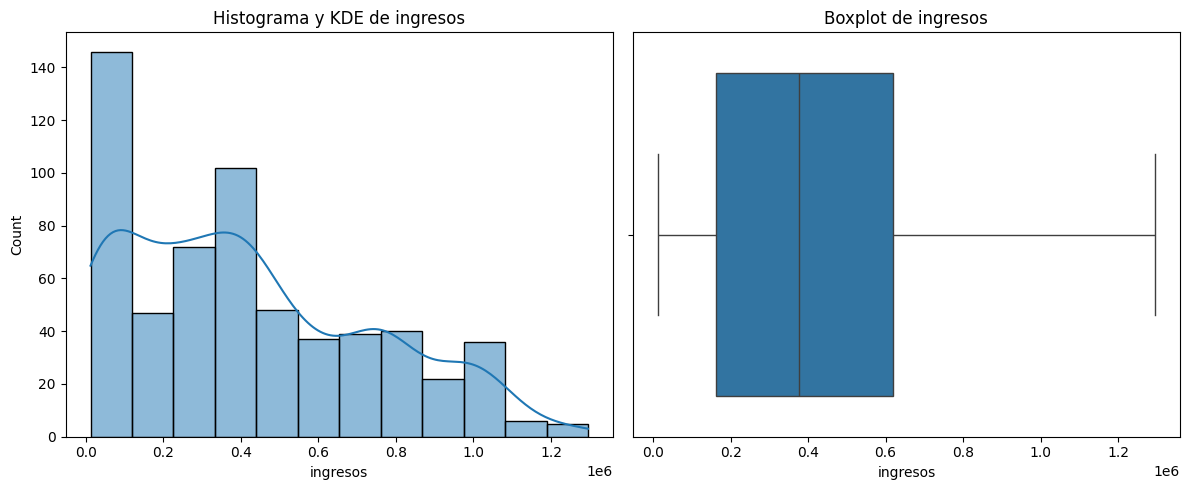

In [ ]:
plot_combined_graphs(df_viajes,["ingresos"])

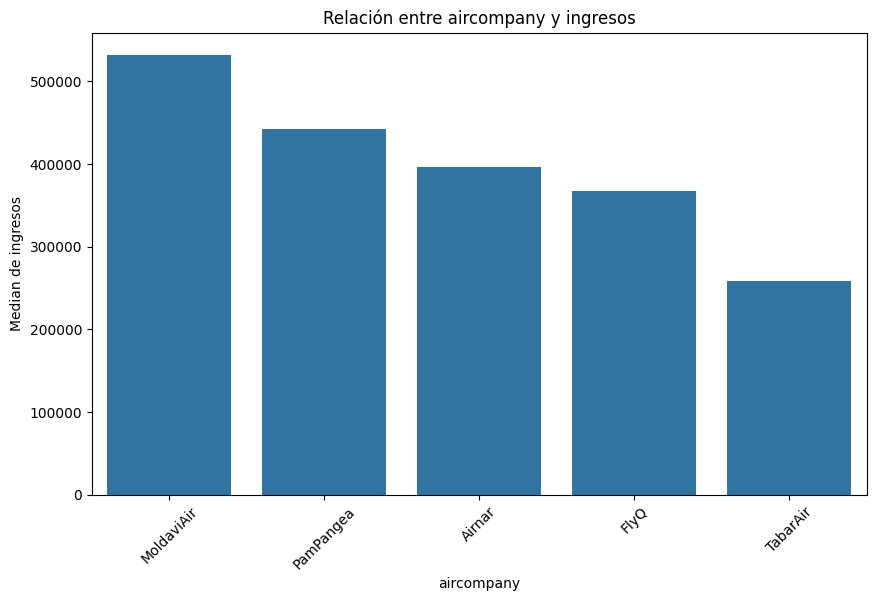

In [35]:
plot_categorical_numerical_relationship(df_viajes, "aircompany","ingresos",measure="median") # Utilizando mediana segun apuntes

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


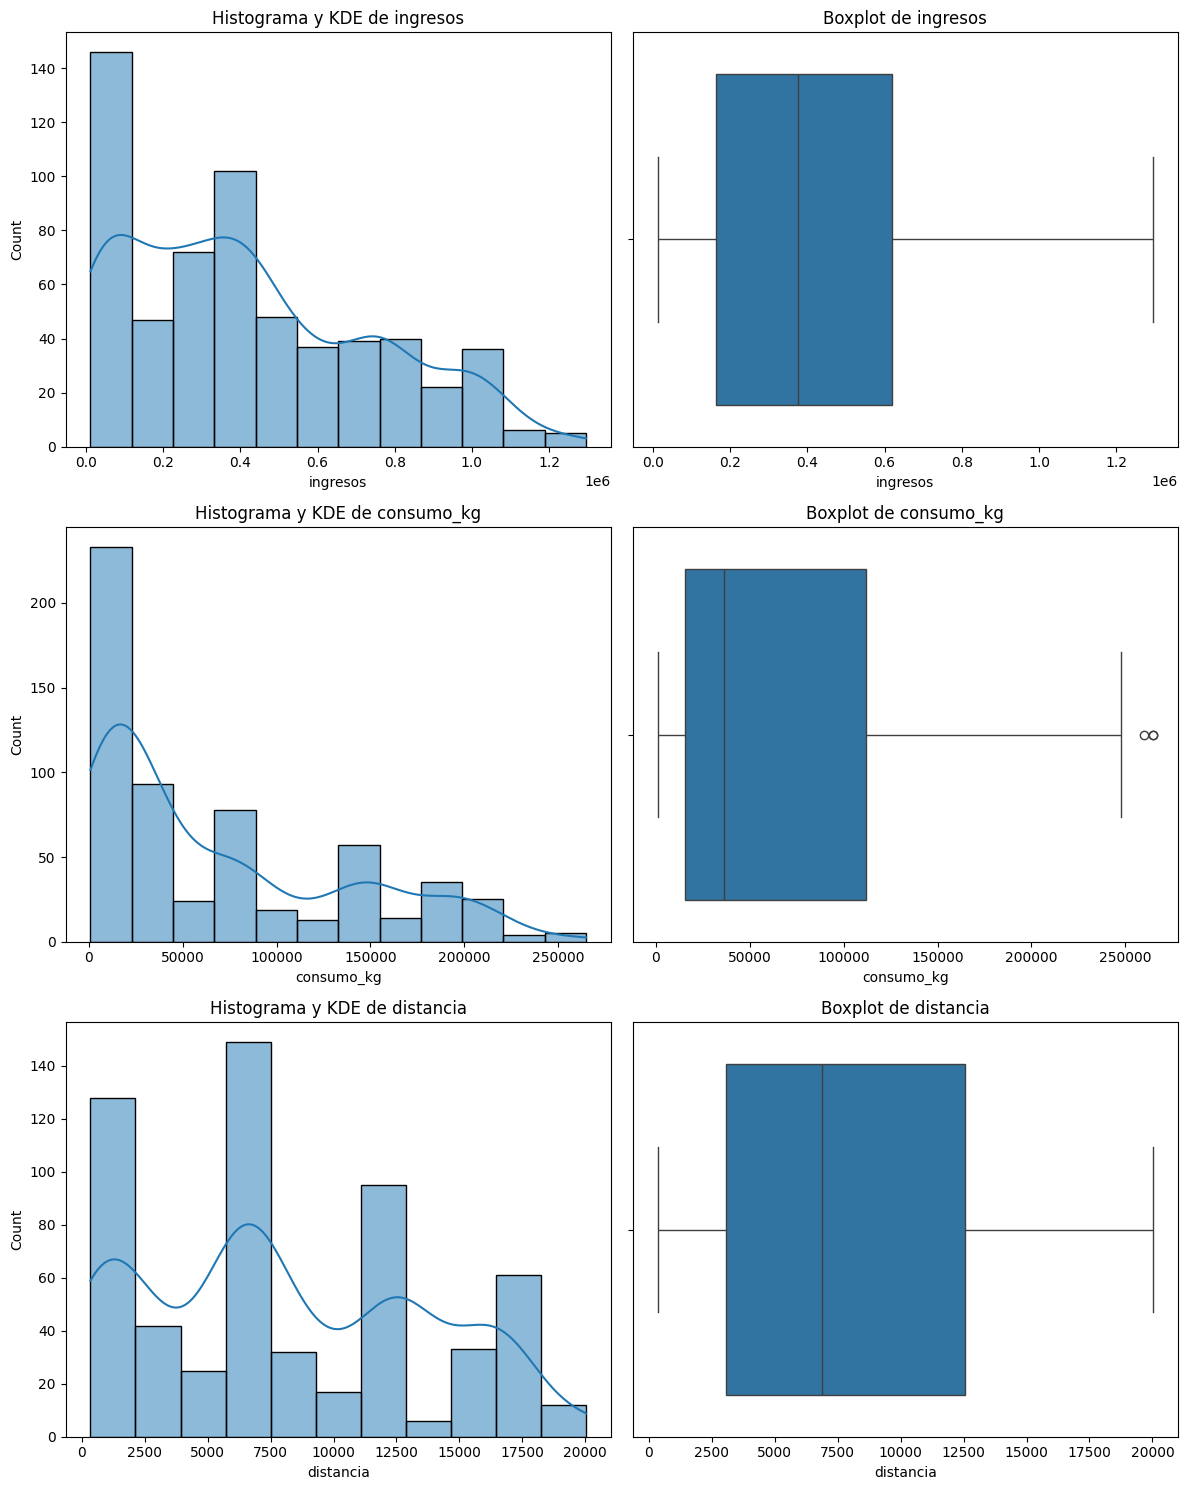

In [36]:
plot_combined_graphs(df_viajes,["ingresos","consumo_kg","distancia"])

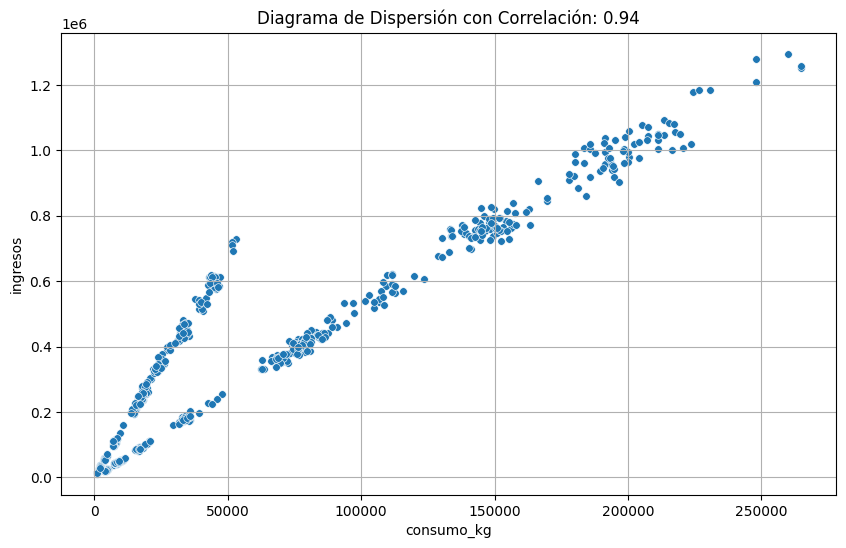

In [37]:
# Consumo e ingresos
grafico_dispersion_con_correlacion(df_viajes,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

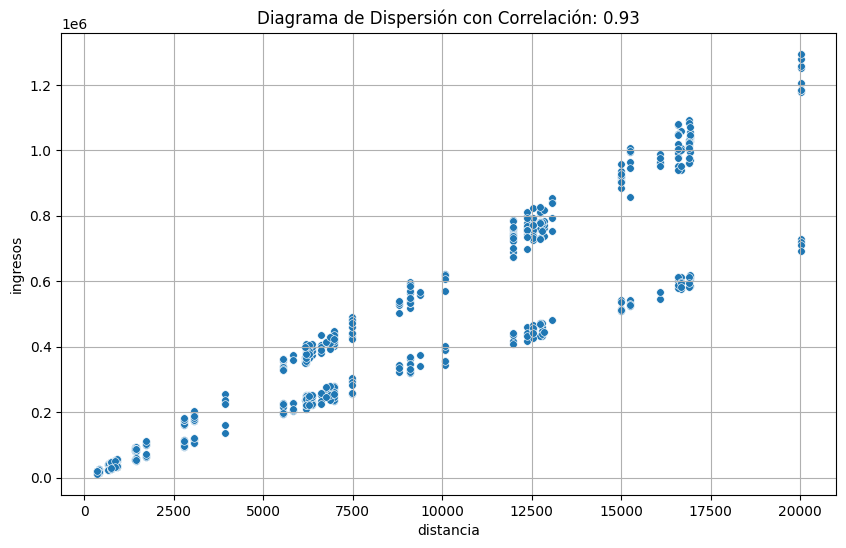

In [38]:
# distancia e ingresos
grafico_dispersion_con_correlacion(df_viajes,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)

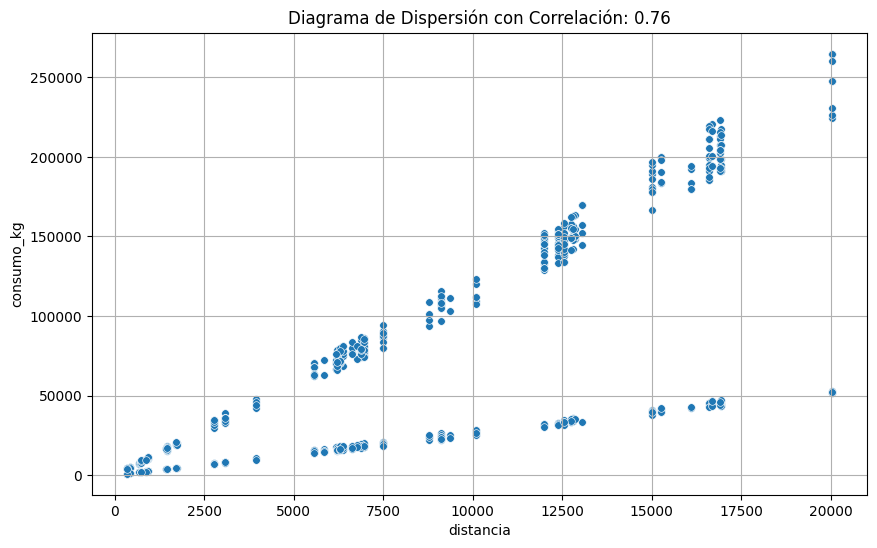

In [39]:
#distancia y consumo
grafico_dispersion_con_correlacion(df_viajes,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

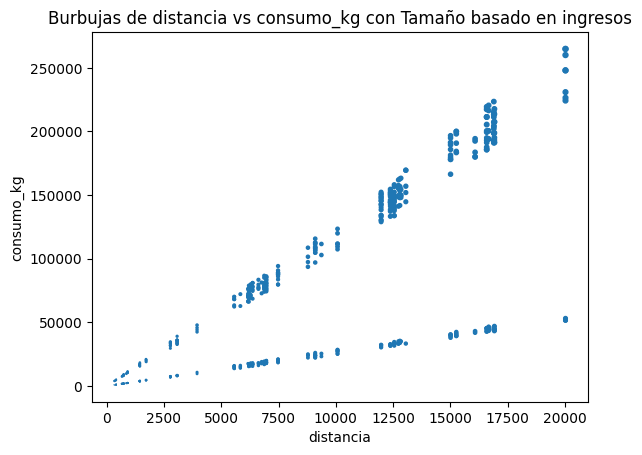

In [40]:
# mostrar los 3 valores a la vez
bubble_plot(df_viajes,"distancia","consumo_kg","ingresos", scale = 100000)

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

(2,)


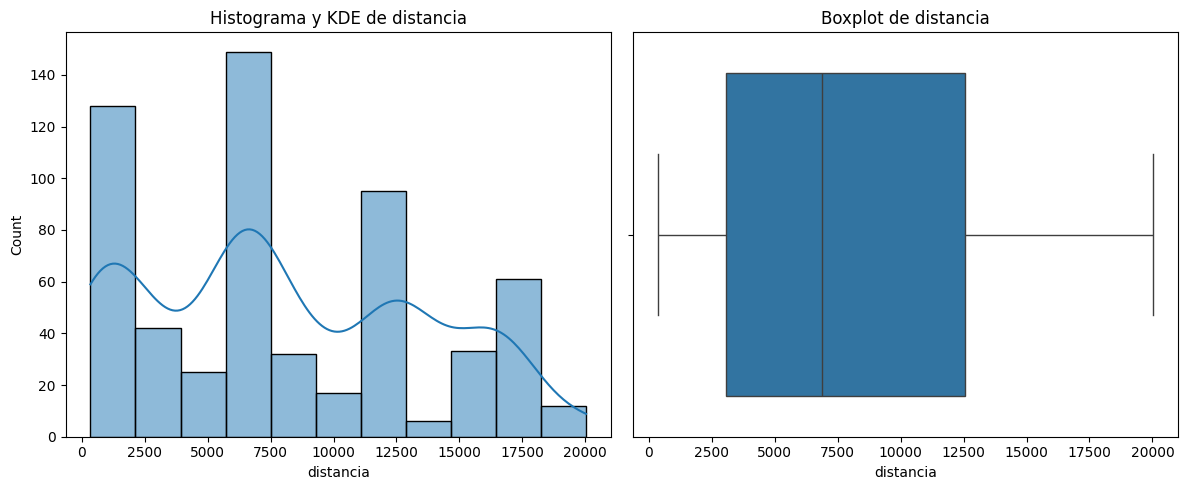

In [41]:
plot_combined_graphs(df_viajes,["distancia"])

In [42]:
df_viajes["distancia"].describe()

count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64

In [44]:
# se corta por los picos
df_viajes["cat_vuelo"] = pd.cut(df_viajes["distancia"], bins=[0, 5500, 11000, 16000, df_viajes["distancia"].max() ], labels=["cat1", "cat2", "cat3", "cat4"])

df_viajes["cat_vuelo"].value_counts()

cat_vuelo
cat2    217
cat1    176
cat3    127
cat4     80
Name: count, dtype: int64

Respuesta cat1:


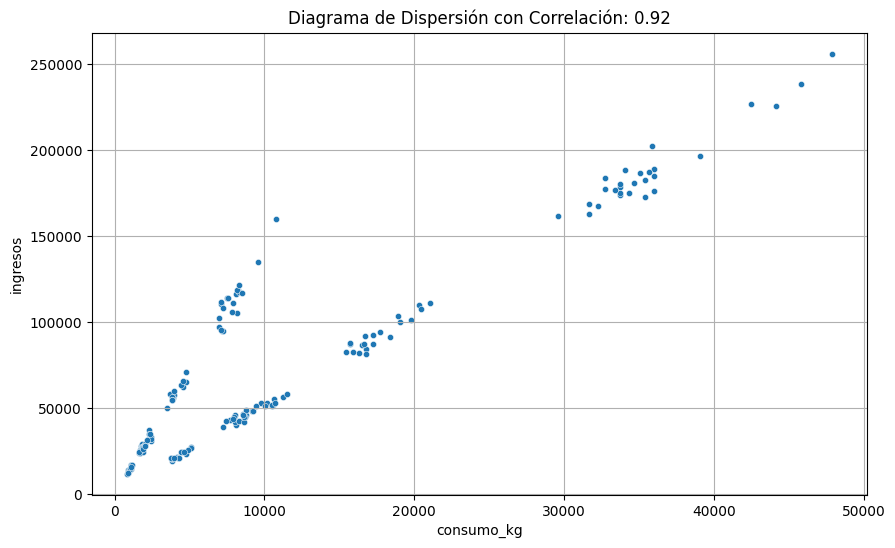

Respuesta cat3:


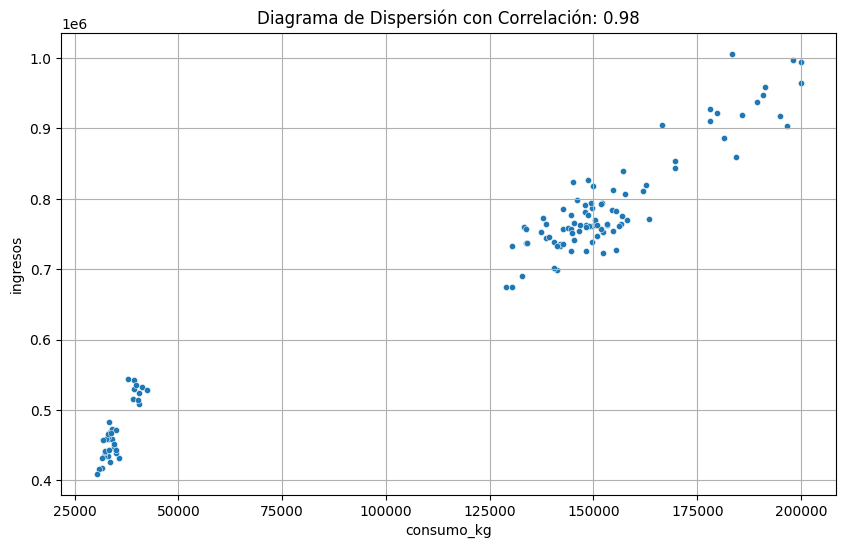

Respuesta cat2:


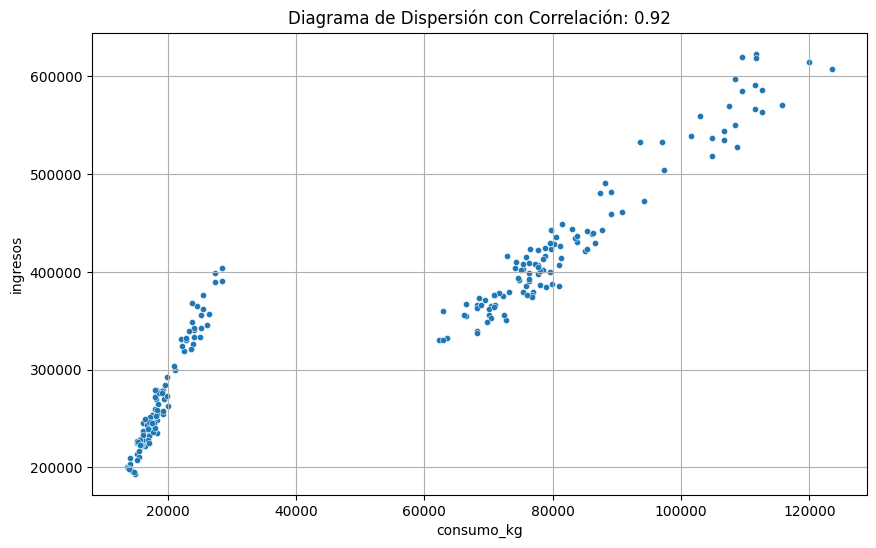

Respuesta cat4:


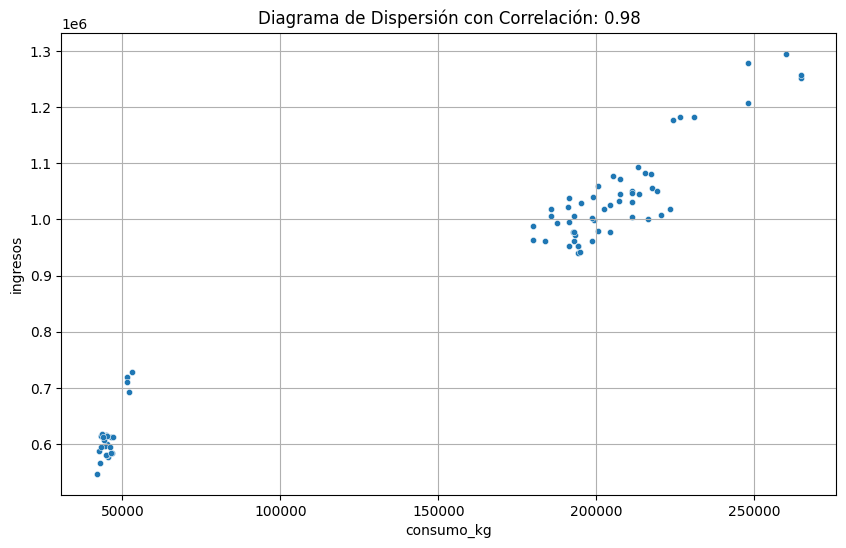

In [45]:
columnas = ["cat_vuelo", "ingresos", "consumo_kg"]
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_viajes[col_directora].unique():
    diccionario_multivariante[valor] = df_viajes.loc[df_viajes[col_directora] == valor,[col_2,col_1]] 
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.